# ADA - Projeto: Técnicas de Programação I

## Professor: Alex Lima

## Grupo 6:

*   Anna Vithória
*   Adriana Augusta
*   Débora Gomes

### TEMA: Desmatamento e Queimadas na Amazônia Legal

[Fonte dos Dados](https://www.kaggle.com/datasets/mbogernetto/brazilian-amazon-rainforest-degradation)


#Contexto

A **Floresta Amazônica**, considerada a maior floresta tropical do mundo, abrange uma área de mais de 5 milhões de km2. A floresta, que conta com um elevado número de espécies (animais e vegetais), é, então, rica em biodiversidade. Essa floresta é importante para a manutenção do equilíbrio ambiental e climático do mundo. Ela fornece diversos recursos naturais para a sociedade, mas sofre com vários problemas ambientais, como os desmatamentos, as queimadas e a biopirataria. Alem disso, há a  Amazônia Legal que é uma delimitação territorial criada pelo governo do Brasil para promover ações específicas para esse bioma.

A **Amazônia** compreende um conjunto de ecossistemas que envolve a bacia
hidrográfica do Rio Amazonas, bem como a Floresta Amazônica; é considerada a
região de maior biodiversidade do planeta e o maior bioma do Brasil. Não é exclusivamente brasileira, sendo, portanto, encontrada em outros países.



 **DESMATAMENTO**

Desde 1988, o programa
[PRODES](http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/prodes)  (Programa de Monitoramento da Floresta Amazônica Brasileira por Satélite), em parceria com o Ministério do Meio Ambiente (MMA) e do Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis (IBAMA) monitora o desmatamento da Floresta Amazônica. Os dados divulgados fornecem as taxas de desmatamento anual, em km^2, para cada Unidade Federativa na qual a Floresta Amazônica está inserida. Essas medidas levam em consideração o decréscimo territorial da Amazônia Legal.

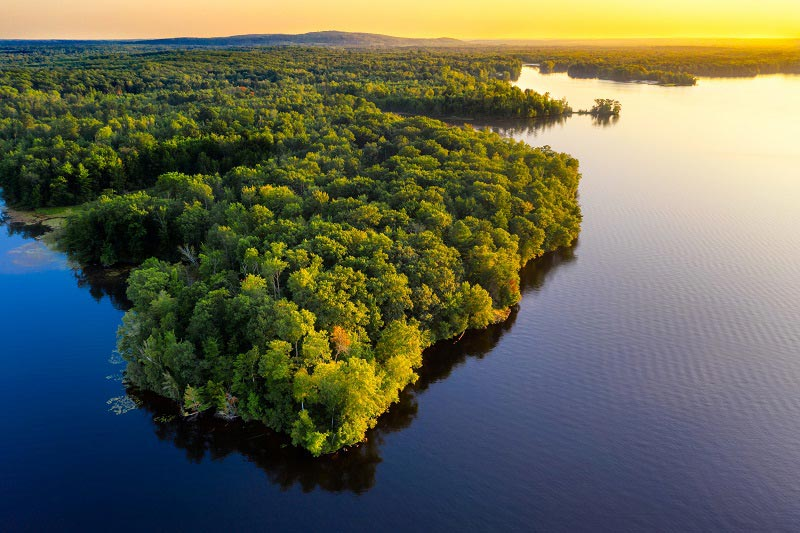





## Carregando os Dados

In [27]:
#Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
desmatamento_df = pd.read_csv('/content/def_area_2004_2019.csv')
queimadas_df = pd.read_csv('/content/inpe_brazilian_amazon_fires_1999_2019.csv')
ninos_df = pd.read_csv('/content/el_nino_la_nina_1999_2019.csv')

### Analisando o dataset de desmatamento:


No dataset a seguir, temos dados de desmatamento nos estados brasileiros que compõem a Amazônia Legal, com areas desmatadas em km2 nos anos de 2004 a 2019. Nele, os atributos são:

1.   Ano = 2004 a 2019
2.   Estados = 'Acre', 'Amazonia', 'Amapa', 'Maranhão', 'Mato Grosso', 'Para', 'Rondonia', 'Roraima', 'Tocantins'
3.   Total

Não há valores nulos ou duplicados, todas as observações são inteiras. Nesse caso, há 16 linhas e 11 colunas, listadas anteriormente.

In [3]:
desmatamento_df.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [4]:
desmatamento_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Ano/Estados  16 non-null     int64
 1   AC           16 non-null     int64
 2   AM           16 non-null     int64
 3   AP           16 non-null     int64
 4   MA           16 non-null     int64
 5   MT           16 non-null     int64
 6   PA           16 non-null     int64
 7   RO           16 non-null     int64
 8   RR           16 non-null     int64
 9   TO           16 non-null     int64
 10  AMZ LEGAL    16 non-null     int64
dtypes: int64(11)
memory usage: 1.5 KB


In [5]:
desmatamento_df.rename( {'Ano/Estados':'year','AMZ LEGAL':'total'}, axis=1, inplace=True)
desmatamento_df.head()

,year,AC,AM,AP,MA,MT,PA,RO,RR,TO,total
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [6]:
desmatamento_df.iloc[:,1:].describe()

,AC,AM,AP,MA,MT,PA,RO,RR,TO,total
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,357.625000,776.562500,38.500000,519.875000,2691.562500,3923.625000,1392.437500,243.187500,77.562500,10020.937500
std,172.476037,300.648625,23.557023,316.705305,2940.367595,1945.802487,943.567413,150.567468,63.238141,6112.467134
min,167.000000,405.000000,8.000000,209.000000,757.000000,1741.000000,435.000000,121.000000,21.000000,4571.000000
25%,256.250000,568.000000,24.000000,257.750000,1108.750000,2411.250000,842.000000,139.000000,46.750000,6365.250000
50%,292.500000,661.000000,30.500000,399.500000,1525.500000,3389.000000,1189.500000,198.500000,57.500000,7500.000000
75%,409.500000,1012.000000,47.750000,722.750000,2823.000000,5546.250000,1434.750000,269.250000,82.250000,11966.000000
max,728.000000,1421.000000,100.000000,1271.000000,11814.000000,8870.000000,3858.000000,617.000000,271.000000,27772.000000


In [7]:
desmatamento_df['year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

### Analisando o dataset de queimadas:


No dataset a seguir, temos dados de queimadas nos estados brasileiros que compõem a Amazônia Legal. Nele, os atributos são:

1.   year = 1999 a 2019
2.   month = 1 a 12
3.   state = 'Acre', 'Amazonia', 'Amapa', 'Maranhão', 'Mato Grosso', 'Para', 'Rondonia', 'Roraima', 'Tocantins'
4.   latitude
5.   longitude
6.   firespots

Não há valores nulos ou duplicados. Nesse caso, há 2104 linhas e 6 colunas, listadas anteriormente.

In [8]:
queimadas_df

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1
...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27


In [9]:
queimadas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2104 non-null   int64  
 1   month      2104 non-null   int64  
 2   state      2104 non-null   object 
 3   latitude   2104 non-null   float64
 4   longitude  2104 non-null   float64
 5   firespots  2104 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 98.8+ KB


In [10]:
queimadas_df.describe()

,year,month,latitude,longitude,firespots
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,2009.267110,6.704848,-5.439282,-56.510314,1167.417776
std,5.963029,3.431949,4.852439,7.382619,2959.558714
min,1999.000000,1.000000,-14.431908,-73.085000,1.000000
25%,2004.000000,4.000000,-9.946974,-62.376004,16.000000
50%,2009.000000,7.000000,-5.808292,-55.876480,121.000000
75%,2014.000000,10.000000,-2.595169,-50.396154,755.000000
max,2019.000000,12.000000,4.151000,-44.188000,37926.000000


In [11]:
queimadas_df['state'].unique()

array(['AMAZONAS', 'MARANHAO', 'MATO GROSSO', 'PARA', 'RONDONIA',
       'RORAIMA', 'AMAPA', 'TOCANTINS', 'ACRE'], dtype=object)

In [12]:
nome_sigla = {'AMAZONAS':'AM', 'MARANHAO': 'MA', 'MATO GROSSO': 'MT', 'PARA':'PA',
             'RONDONIA':'RO','RORAIMA': 'RR', 'AMAPA': 'AP', 'TOCANTINS':'TO', 'ACRE':'AC'}

queimadas_df.insert(loc = 3,column = 'code',value = queimadas_df['state'].replace(nome_sigla))
queimadas_df

,year,month,state,code,latitude,longitude,firespots
0,1999,1,AMAZONAS,AM,-2.371113,-59.899933,3
1,1999,1,MARANHAO,MA,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,MT,-12.660633,-55.057989,18
3,1999,1,PARA,PA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,RO,-12.861700,-60.513100,1
...,...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,MT,-12.138385,-56.066297,148
2100,2019,12,PARA,PA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,RO,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,RR,2.856667,-60.431963,27


In [13]:
queimadas_df['year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [14]:
queimadas_df2 = queimadas_df[queimadas_df['year'] > 2003]
queimadas_df2

,year,month,state,code,latitude,longitude,firespots
455,2004,1,AMAPA,AP,0.131862,-51.642086,58
456,2004,1,AMAZONAS,AM,-0.761964,-64.503152,277
457,2004,1,MARANHAO,MA,-3.133702,-45.985558,242
458,2004,1,MATO GROSSO,MT,-12.428064,-55.528333,171
459,2004,1,PARA,PA,-2.370078,-50.867593,875
...,...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,MT,-12.138385,-56.066297,148
2100,2019,12,PARA,PA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,RO,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,RR,2.856667,-60.431963,27


### Analisando o dataset de El Niño e La Niña


No dataset a seguir, temos dados de El Niño e La Niña, de  1999 a 2019. Nele, os atributos são:

1.   start_year = 1999 a 2018
2.   end_year = 2000 a 2019
3.   phenomenon = El Niño ou La Niña
4.   severity = weak, moderate, strong, very strong

Não há valores nulos ou duplicados. Nesse caso, há 16 linhas e 4 colunas, listadas anteriormente.

In [15]:
ninos_df.head()

,start year,end year,phenomenon,severity
0,2004,2005,El Nino,Weak
1,2006,2007,El Nino,Weak
2,2014,2015,El Nino,Weak
3,2018,2019,El Nino,Weak
4,2002,2003,El Nino,Moderate


In [16]:
ninos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start year  16 non-null     int64 
 1   end year    16 non-null     int64 
 2   phenomenon  16 non-null     object
 3   severity    16 non-null     object
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [17]:
ninos_df2 = ninos_df.sort_values('start year',ignore_index=True)
ninos_df2.drop('end year',axis=1,inplace=True)
ninos_df2.rename({'start year':'year'},axis=1,inplace=True)
ninos_df2

,year,phenomenon,severity
0,1999,La Nina,Strong
1,2000,La Nina,Weak
2,2002,El Nino,Moderate
3,2004,El Nino,Weak
4,2005,La Nina,Weak
5,2006,El Nino,Weak
6,2007,La Nina,Strong
7,2008,La Nina,Weak
8,2009,El Nino,Moderate
9,2010,La Nina,Strong


# Análise Exploratória dos Dados (EDA)

<Axes: xlabel='Sigla', ylabel='Área Desmatada (km2)'>

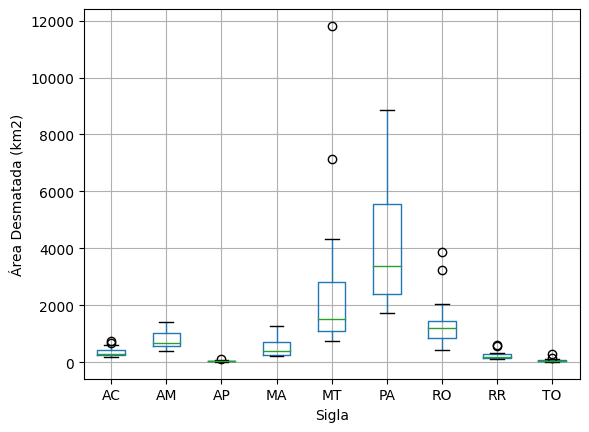

In [18]:
desmatamento_df.iloc[:,1:-1].boxplot(xlabel='Sigla',ylabel='Área Desmatada (km2)')

Nesse gráfico de caixa (boxplot), vemos:
- a faixa de variação na area desmatada em cada estado;
- a ocorrência de outliers em alguns estados;
- a dispersão (variação) mais ampla em alguns estados.

As maiores ocorrências bem como as maiores variações de desmatamento ocorreram em MT e PA.

<Axes: xlabel='Ano', ylabel='Área Desmatada (km2)'>

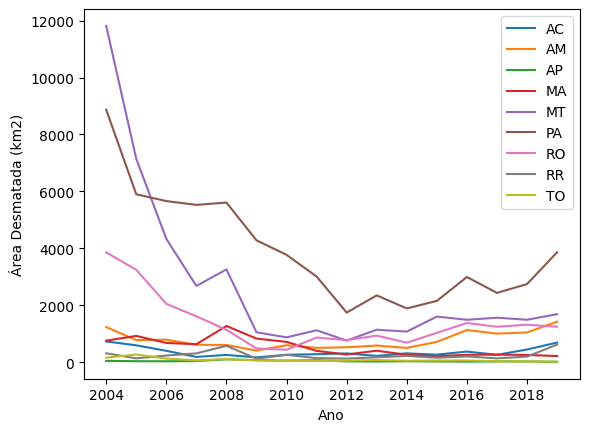

In [19]:
desmatamento_df.iloc[:,:-1].plot(x='year',
                            xlabel='Ano',ylabel='Área Desmatada (km2)')

**Amazonia Legal:** A média de area desvastada no AM Legal  foi de 10020.94km2, onde o menor indice foi de 4571km2 no ao de 2009 por sua vez a maior area desmatada foi 27772 km2 no aos de 2004 e nesse periodo o total  das areas desmatadas foi de 160335 Km2

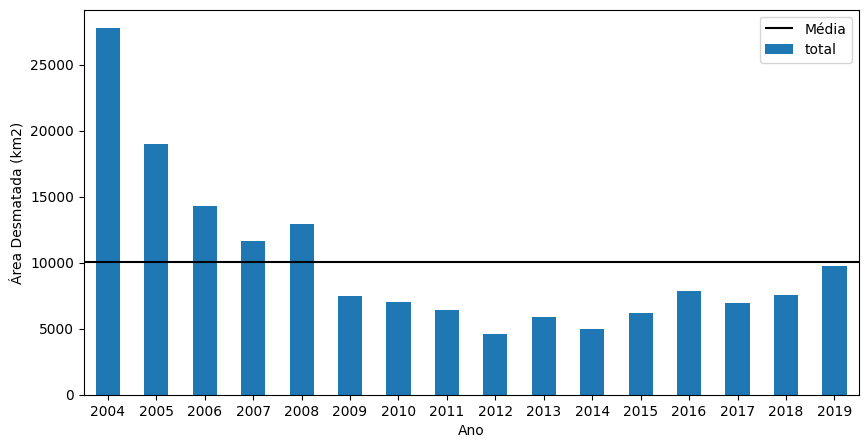

In [20]:
desmatamento_df.plot(kind = 'bar',x='year',y="total",
                    figsize=(10,5),rot=0,
                    xlabel='Ano', ylabel='Área Desmatada (km2)'
                    )

plt.hlines(y=desmatamento_df['total'].mean(),xmin=-1,xmax=17,label='Média',color='k')
plt.legend()
plt.show()

In [21]:
info = desmatamento_df.iloc[:,1:-1].div(desmatamento_df['total'],axis=0)
info = (info*100).round(2).astype(str) + '%'
info.index=desmatamento_df['year']
info.head()

,AC,AM,AP,MA,MT,PA,RO,RR,TO
year,,,,,,,,,
2004,2.62%,4.44%,0.17%,2.72%,42.54%,31.94%,13.89%,1.12%,0.57%
2005,3.11%,4.08%,0.17%,4.85%,37.58%,31.02%,17.06%,0.7%,1.43%
2006,2.79%,5.52%,0.21%,4.72%,30.33%,39.61%,14.34%,1.62%,0.87%
2007,1.58%,5.24%,0.33%,5.42%,22.99%,47.43%,13.83%,2.65%,0.54%
2008,1.97%,4.68%,0.77%,9.84%,25.23%,43.43%,8.8%,4.45%,0.83%


# QUEIMADAS

Os dados a seguir são de focos de queimadas na floresta entre os anos 1999 e 2019, adicionado a isso vamos tentar mostrar o impacto que os fenomenos La Nina e El Nino causam na floresta, isso se deve por os fenômenos provocarem secas ou chuvas em todo o país.

O El Nino na região Norte do país, onde esta localizada a floresta, causa secas severas, assim pode impactar no número de focos de queimadas ou a propagação das mesmas. Já o La Nina causa volumes maiores de chuva, aumentando a umidade e ocorrência de frentes frias.

In [30]:
''' Aqui após identificar que o ano de 2004 foi o que teve mais queimadas, queremos
descobrir o estado que mais teve peso maior peso '''

linhas_filtradas = queimadas_df.loc[queimadas_df['year'] == 2004 ]
soma = linhas_filtradas['firespots'].sum()

# retornando o valor pesquisado
maior_queimada_2004 = queimadas_df[queimadas_df['year'] == 2004].nlargest(1, 'firespots')
maior_queimada_2004

,year,month,state,code,latitude,longitude,firespots
527,2004,9,MATO GROSSO,MT,-11.093895,-56.204235,24886


In [31]:
# Agora mostrando o percentual em comparação aos outros estados
maior_queimada_2004['Percentual'] = round((maior_queimada_2004['firespots'] / soma) * 100,2)
maior_queimada_2004

,year,month,state,code,latitude,longitude,firespots,Percentual
527,2004,9,MATO GROSSO,MT,-11.093895,-56.204235,24886,11.38


# Focos de incendio por ano

In [25]:
queimadas_df['year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

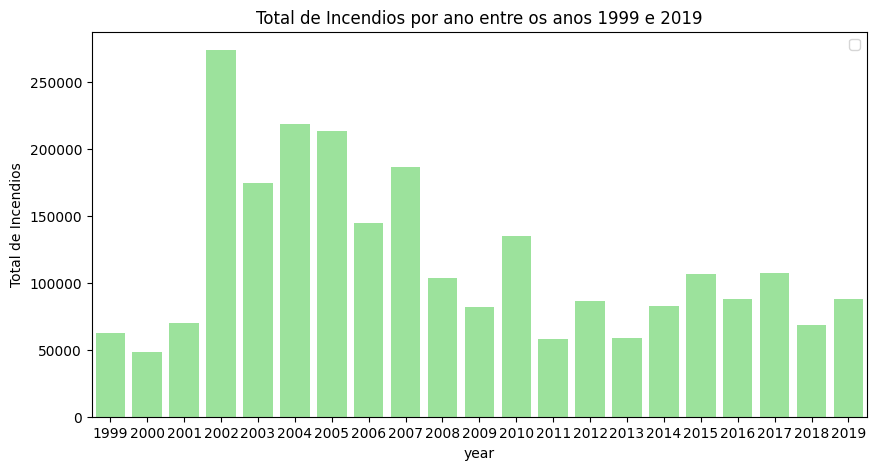

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='year', y="firespots",  data=queimadas_df,estimator='sum',errorbar=None,color='lightgreen')


plt.title('Total de Incendios por ano entre os anos 1999 e 2019' )
plt.xlabel('year')
plt.ylabel('Total de Incendios')
plt.legend()

Nos anos analisado o ano de 2002 foi o ano com a maior quantidade de incêndios,com um total de 273873 focos de incendio, havendo um crescimento de 74.56% se comparado ao ano de 2001, nesse ano o total de incendios foi de 69675. Por sua vez o ano com menor indices foi 2000 com 48168 focos, apos essa elevaçao no numero de incedios que ocorreu no ano 2002, o numero de incidentes é bem variavel de um ano para outro. Porem o melhor resultado foi em 2011 onde houve o menor numero de registros desde 2001.

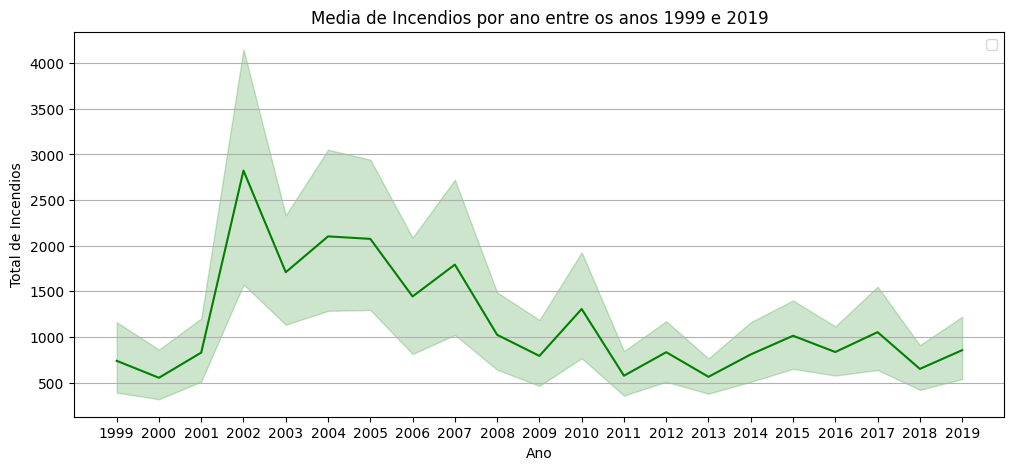

In [32]:
anos = list(range(1999,2020))
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=queimadas_df, x='year', y='firespots', estimator='mean', color="green")


plt.title('Media de Incendios por ano entre os anos 1999 e 2019' )
plt.xlabel('Ano')
plt.xticks(anos)
plt.ylabel('Total de Incendios')
plt.grid(axis='y')
plt.legend()

In [36]:
soma_ano_01 = queimadas_df.loc[(queimadas_df['year'] == 2001)]['firespots'].sum()
soma_ano_02 = queimadas_df.loc[(queimadas_df['year'] == 2002)]['firespots'].sum()
var = ((soma_ano_02 - soma_ano_01)/soma_ano_02)*100
print(f'Crescimento de {var:.2f} % entre os anos de 2001 e 2002')
print('Ano de 2001 ',soma_ano_01)
print('Ano de 2002 ',soma_ano_02)

Crescimento de 74.56 % entre os anos de 2001 e 2002
Ano de 2001  69675
Ano de 2002  273873


In [39]:
soma_ano_00 = queimadas_df.loc[(queimadas_df['year'] == 2000)]['firespots'].sum()
soma_ano_11 = queimadas_df.loc[(queimadas_df['year'] == 2011)]['firespots'].sum()
soma_ano_13 = queimadas_df.loc[(queimadas_df['year'] == 2013)]['firespots'].sum()
print('Ano de 2000 ',soma_ano_00)
print('Ano de 2011 ',soma_ano_11)
print('Ano de 2013 ',soma_ano_13)

Ano de 2000  48168
Ano de 2011  58186
Ano de 2013  58688


In [40]:
df_sf = queimadas_df[['year','firespots','state']].groupby(['year'])

In [41]:
df_sf.describe()

firespots                                                               
         count         mean          std  min    25%    50%      75%      max
year                                                                         
1999      85.0   739.505882  1904.124912  1.0   4.00   28.0   375.00  12707.0
2000      87.0   553.655172  1184.122635  1.0  12.00   40.0   244.00   5484.0
2001      84.0   829.464286  1692.135704  1.0   7.75   76.5   661.75   9042.0
2002      97.0  2823.432990  6522.052313  1.0  11.00  153.0  1486.00  37926.0
2003     102.0  1709.803922  3177.639410  1.0  18.75  241.0  1474.50  14666.0
2004     104.0  2102.278846  4719.879179  1.0  20.75  202.0  1068.75  24886.0
2005     103.0  2074.951456  4551.414584  1.0  25.00  175.0  1317.50  23635.0
2006     100.0  1444.220000  3214.335804  1.0  20.75  170.0   898.00  15064.0
2007     104.0  1793.076923  4394.850097  1.0  15.75  180.5   856.50  24779.0
2008     101.0  1024.287129  2266.669823  1.0  17.00  120.0   651.00  11568.0
2009     103.0   793.029126  1929.955747  1.0  10.00  109.0   463.00  12485.0
2010     103.0  1306.932039  3169.626932  1.0  22.50  141.0   738.00  21677.0
2011     101.0   576.099010  1209.657228  1.0  12.00  105.0   407.00   6821.0
2012     104.0   833.836538  1767.103291  1.0  15.00  117.5   654.00   9168.0
2013     104.0   564.307692  1124.573482  1.0  17.50  110.5   422.75   5579.0
2014     102.0   809.352941  1650.426297  1.0  19.00  123.5   586.50   8147.0
2015     105.0  1013.695238  2013.150502  1.0  18.00  127.0   882.00   9783.0
2016     105.0   835.819048  1429.573321  1.0  30.00  150.0   941.00   7314.0
2017     102.0  1053.323529  2361.559189  1.0  22.50  122.5   903.25  15735.0
2018     105.0   650.904762  1322.972865  1.0  14.00   95.0   536.00   6276.0
2019     103.0   855.679612  1758.171996  1.0  21.50   86.0   630.00  10185.0

# Incendios por Mês




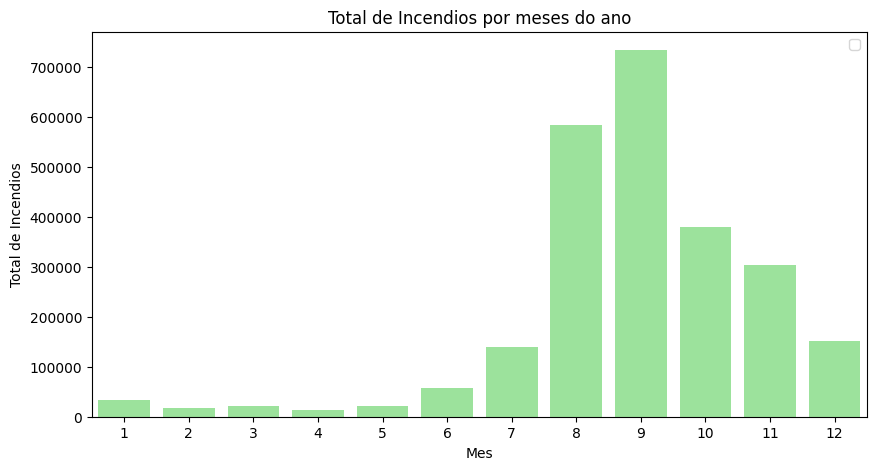

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='month', y="firespots",  data=queimadas_df,estimator='sum',errorbar=None,color='lightgreen')


plt.title('Total de Incendios por meses do ano' )
plt.xlabel('Mes')
plt.ylabel('Total de Incendios')
plt.legend()

# Incendio por Estado

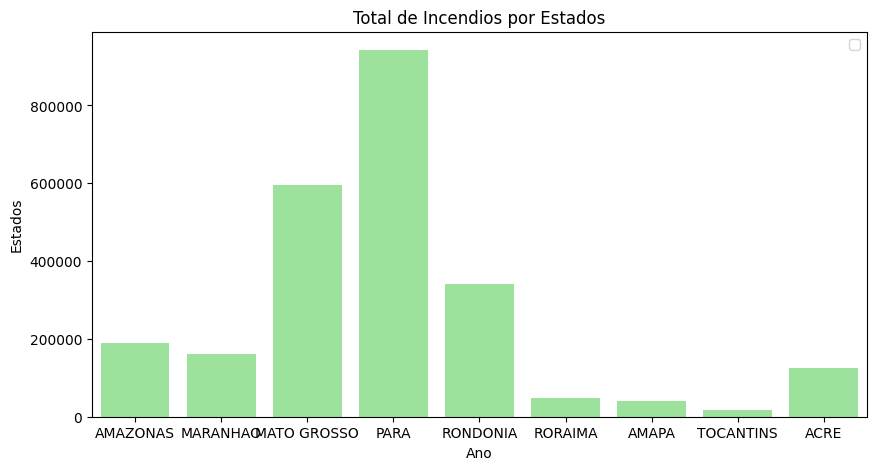

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='state', y="firespots",  data=queimadas_df,estimator='sum',color='lightgreen',errorbar=None)


plt.title('Total de Incendios por Estados' )
plt.xlabel('Ano')
plt.ylabel('Estados')
plt.legend()

O estado com maior numero de focos de incêndio foi o Pará, seguido pelo Mato Grosso e em terceiro Rondonia. Durante os anos de 1999 e 2009, somente no Pará foram registrados 952283 focos de incêndio, isso representa 38.36% de do numero trotal de incendios no periodo de 20 anos. O ponto mais crítico se deu em agosto de 2002, com 37926 casos.

Por sua vez o estado de Tocantins possui a menor quantidade de focos de incendio, porém vale lembrar que comparada ao Para ou Mato Grosso o estado possui um território menor, alem de não possuir uma grande cobertura de Floresta Amazonica, seu maior bioma é o Cerrado.



In [46]:
df_por_estado = queimadas_df[['state','firespots','year']].groupby(['state'])

In [47]:
df_por_estado['firespots'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
ACRE,204.0,619.955882,1310.910541,1.0,4.75,39.0,412.00,7669.0
AMAPA,197.0,199.680203,346.865828,1.0,2.00,19.0,211.00,2148.0
AMAZONAS,250.0,753.932000,1270.353440,1.0,24.25,119.5,823.25,6668.0
MARANHAO,241.0,666.153527,1140.735752,1.0,15.00,184.0,941.00,9251.0
MATO GROSSO,252.0,2362.611111,4189.033252,4.0,272.50,682.0,2524.25,24886.0
PARA,250.0,3769.132000,5426.610391,4.0,64.25,860.5,6143.50,37926.0
RONDONIA,246.0,1384.215447,3295.132676,1.0,20.00,104.0,1020.75,23414.0
RORAIMA,243.0,193.337449,308.768029,1.0,14.00,76.0,263.50,2433.0
TOCANTINS,221.0,73.547511,157.892178,1.0,4.00,18.0,65.00,1490.0


In [48]:
df_por_estado['firespots'].sum().min()

16254

In [49]:
df_por_estado['firespots'].sum()

state
ACRE           126471
AMAPA           39337
AMAZONAS       188483
MARANHAO       160543
MATO GROSSO    595378
PARA           942283
RONDONIA       340517
RORAIMA         46981
TOCANTINS       16254
Name: firespots, dtype: int64

In [50]:
df_para = queimadas_df[queimadas_df['state']=='PARA']
df_para

,year,month,state,code,latitude,longitude,firespots
3,1999,1,PARA,PA,-2.474820,-48.546967,87
9,1999,2,PARA,PA,-2.150617,-53.509911,285
16,1999,3,PARA,PA,-5.088771,-52.333343,7
21,1999,4,PARA,PA,-6.392087,-52.284017,6
25,1999,5,PARA,PA,-5.520697,-51.333575,4
...,...,...,...,...,...,...,...
2064,2019,8,PARA,PA,-6.484579,-53.723136,10185
2073,2019,9,PARA,PA,-5.952494,-52.249601,4618
2082,2019,10,PARA,PA,-3.741208,-51.061007,3870
2091,2019,11,PARA,PA,-3.025725,-51.419423,7390


In [51]:
soma_para= df_para['firespots'].sum()
soma_para

942283

In [62]:
from pandas.core.arrays.arrow.dtype import pa
incendio_total = queimadas_df['firespots'].sum()
percentual_para = (soma_para/incendio_total)*100
print(f'{percentual_para:.2f}%')

38.36%


In [53]:
max_para = df_para['firespots'].max()
max_para

37926

In [54]:
ano_max_para = df_para.loc[(df_para['firespots'] == 37926)]['year']
ano_max_para

313    2002
Name: year, dtype: int64

In [55]:
mes_max_para= df_para.loc[(df_para['firespots'] == 37926)]['month']
mes_max_para

313    8
Name: month, dtype: int64

# Relação de área desmatada e focos de incendio

Modificando o dataset de desmatamento

In [56]:
dev_area = pd.melt(desmatamento_df, id_vars=['year'], var_name='states', value_name='Devastado')
dev_area

,year,states,Devastado
0,2004,AC,728
1,2005,AC,592
2,2006,AC,398
3,2007,AC,184
4,2008,AC,254
...,...,...,...
155,2015,total,6207
156,2016,total,7893
157,2017,total,6947
158,2018,total,7536


In [58]:
devastado_ano = dev_area.groupby("year").sum().reset_index()

<ipython-input-58-3930dec82ce5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  devastado_ano = dev_area.groupby("year").sum().reset_index()


In [63]:
devastado_ano.head(16)

,year,Devastado
0,2004,55544
1,2005,38028
2,2006,28572
3,2007,23302
4,2008,25822
5,2009,14928
6,2010,14000
7,2011,12836
8,2012,9142
9,2013,11782


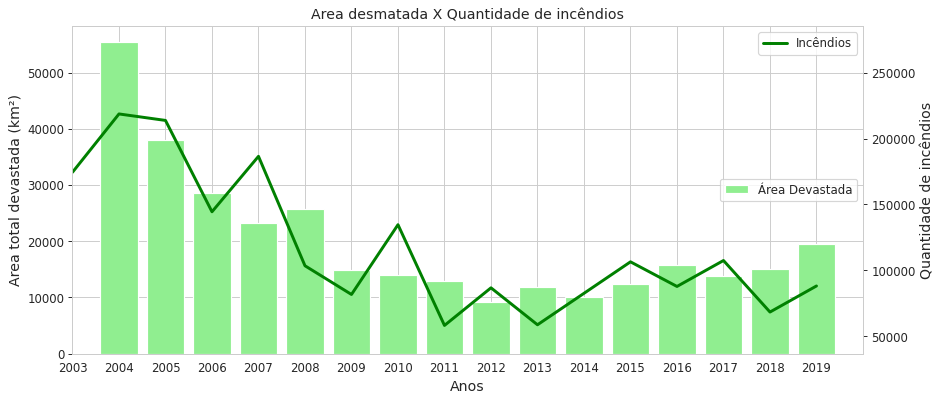

In [67]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")
ax.bar(devastado_ano['year'], devastado_ano['Devastado'], color='lightgreen',label='Área Devastada')
plt.grid(True)
ax.legend(loc="center right")
ax.set_ylabel("Area total devastada (km²)", size="large")
ax.set_xlabel("Anos", size="large")
ax.set_title("Area desmatada X Quantidade de incêndios")

ax2 = ax.twinx()
sns.lineplot(x=queimadas_df['year'], y=queimadas_df['firespots'], estimator='sum', color="green", errorbar=None, ax=ax2, label='Incêndios', lw=2.5)
ax2.set_xticks(ticks=list(range(2003, 2020)))
ax2.set_xlim(2003, 2020)
ax2.set_ylabel("Quantidade de incêndios", size="large")
plt.grid(False)
ax2.legend(loc='best');

In [68]:
des_queim = queimadas_df[queimadas_df['year'] > 2003].groupby('year').sum().reset_index()

<ipython-input-68-25a6bc1c48b3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  des_queim = queimadas_df[queimadas_df['year'] > 2003].groupby('year').sum().reset_index()


In [69]:
des_queim['Area'] = devastado_ano.groupby('year').sum().reset_index()['Devastado']

In [70]:
des_queim

,year,month,latitude,longitude,firespots,Area
0,2004,693,-548.511711,-5859.731705,218637,55544
1,2005,688,-562.042486,-5838.961858,213720,38028
2,2006,656,-552.639181,-5653.694789,144422,28572
3,2007,675,-566.014018,-5890.997734,186480,23302
4,2008,676,-533.649772,-5717.709597,103453,25822
5,2009,688,-532.065750,-5816.782760,81682,14928
6,2010,684,-580.829003,-5841.816541,134614,14000
7,2011,683,-536.807112,-5719.187631,58186,12836
8,2012,692,-538.879432,-5861.028097,86719,9142
9,2013,694,-542.199398,-5836.567889,58688,11782


In [72]:
des_queim[["firespots", "Area"]].corr()

,firespots,Area
firespots,1.000000,0.833778
Area,0.833778,1.000000


<Axes: >

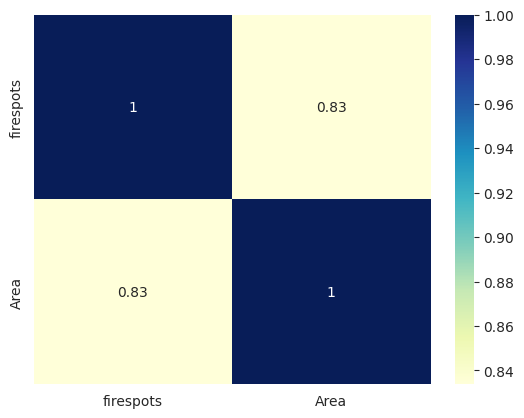

In [73]:
sns.heatmap(des_queim[["firespots", "Area"]].corr(), annot=True,cmap ="YlGnBu")

# Relação das Queimadas com fenômenos El Nino e La Nina

Os dados a seguir são de focos de queimadas na floresta entre os anos 1999 e 2019, adicionado tentar mostrar o impacto que os fenomenos La Nina e El Nino causam na floresta, isso se deve por os fenômenos provocarem secas ou chuvas em todo o país.

O El Nino na região Norte do país, onde esta localizada a floresta, causa secas severas, assim pode impactar no número de focos de queimadas ou a propagação das mesmas. Já o La Nina causa volumes maiores de chuva, aumentando a umidade e ocorrência de frentes frias.

In [76]:
ninos_df2

,year,phenomenon,severity
0,1999,La Nina,Strong
1,2000,La Nina,Weak
2,2002,El Nino,Moderate
3,2004,El Nino,Weak
4,2005,La Nina,Weak
5,2006,El Nino,Weak
6,2007,La Nina,Strong
7,2008,La Nina,Weak
8,2009,El Nino,Moderate
9,2010,La Nina,Strong


In [77]:
ninos_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        16 non-null     int64 
 1   phenomenon  16 non-null     object
 2   severity    16 non-null     object
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [80]:
ninos_df2['year'] = ninos_df2['year'].astype(int)

In [81]:
ninos_df2 = ninos_df2.sort_values(by='year', ascending=True)

In [82]:
ninos_df2.loc[16] = ['2001', 'La Nina', 'Weak']
ninos_df2.loc[17] = ['2003', 'El Nino', 'Moderate']
ninos_df2.loc[18] = ['2012', 'La Nina', 'Moderate']
ninos_df2.loc[19] = ['2019', 'El Nino', 'Weak']

In [83]:
ninos_df2['year'].unique()

array([1999, 2000, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2014, 2015, 2016, 2017, 2018, '2001', '2003', '2012', '2019'],
      dtype=object)

In [84]:
#df_nino.rename(
 #   {
  #  'start year':'Ano',
   # 'phenomenon':'Fenomeno',
    #'severity':'Severidade',

    #}, axis=1, inplace=True)

In [86]:
df_queimar = df_sf.sum().reset_index()

<ipython-input-86-4d257836e3c3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_queimar = df_sf.sum().reset_index()


In [87]:
df_queimar

,year,firespots
0,1999,62858
1,2000,48168
2,2001,69675
3,2002,273873
4,2003,174400
5,2004,218637
6,2005,213720
7,2006,144422
8,2007,186480
9,2008,103453


In [89]:
unir = pd.merge(df_queimar, ninos_df2, how = 'inner', on = 'year')

In [90]:
unir

,year,firespots,phenomenon,severity
0,1999,62858,La Nina,Strong
1,2000,48168,La Nina,Weak
2,2002,273873,El Nino,Moderate
3,2004,218637,El Nino,Weak
4,2005,213720,La Nina,Weak
5,2006,144422,El Nino,Weak
6,2007,186480,La Nina,Strong
7,2008,103453,La Nina,Weak
8,2009,81682,El Nino,Moderate
9,2010,134614,La Nina,Strong


Houve uma maior ocorrencia de incendios quando o El Nino foi moderado, é provevel que devido a seca causado pelo fenomeno os incedios tenham se propagado

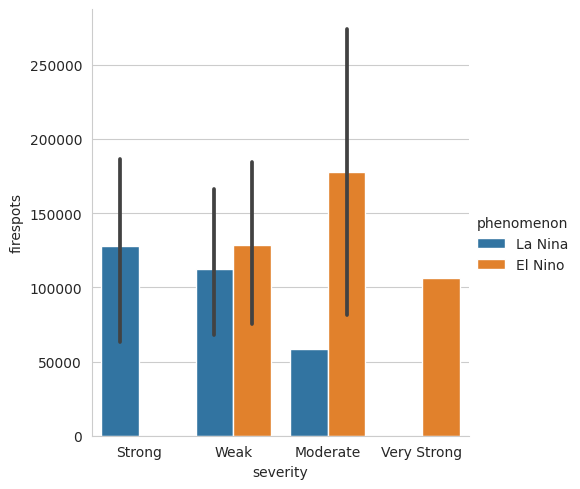

In [93]:
sns.catplot(data=unir, x="severity", y="firespots", hue="phenomenon",kind="bar")